In [13]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shapely.geometry import LineString

from collections import deque

# 1º Etapa - Criar os obstaculos e os pontos iniciais e finais

Essa etapa consiste em criar um mapa de proporção MxN, capaz de alocar todos os obstaculos e os pontos iniciais e finais;

Observações:

- Todos os obstaculos devem ser gerados automaticamente
- Todos os obstaculos devem estar dentro do espaço do mapa (Caso aconteça, sortear uma nova posição)
- Nenhum obstaculo deve sobrepor o outro (Caso aconteça, sortear uma nova posição)

- para coordenadas, seguir a seguinte ordem para os valores em um array

0-----1 <br>
2-----3


# Função para validar coordenada

Essa função tem como objetivo receber um ponto e verificar se esse ponto está compreendido dentro de um retangulo de coordenadas.

A função é útil para os seguintes casos:
- Verificar se o ponto está dentro do mapa;
- Verificar se um ponto de um obstaculo não sobrepoe outro obstaculo;

In [14]:
def coordenada_valida(ponto, x_min_mapa, y_min_mapa, x_max_mapa, y_max_mapa):
    '''
    ponto: [x,y]
    x_min: Coordenada x minima do mapa
    y_min: Coordenada y minima do mapa
    x_max: Coordenada x máxima do mapa
    y_max: Coordenada y máxima do mapa
    
    retorna True caso seja no intervalo e False caso a coordenada seja inválida
    
    '''
    return x_min_mapa <= ponto[0] <= x_max_mapa and y_min_mapa <= ponto[1] <= y_max_mapa   

# Função Obstaculo Sobreposto

Essa função tem como objetivo verificar se algum ponto (x,y) do novo obstaculo criado está dentro de um obstaculo criado anteriormente.

In [15]:
def obstaculo_sobreposto(novo_obstaculo, obstaculos):
    '''
    novo_obstaculo: lista com os pontos do novo obstaculo -> [[x,y], [x,y], [x,y], [x,y]]
    obstaculos: lista com todos os obstaculos já criados -> [[[x,y], [x,y], [x,y], [x,y]] , [[x,y], [x,y], [x,y], [x,y]]]
    
    
    retornar True se os obstaculos se sobrepoe. False caso não se sobrepoe.
    '''
    
    for obstaculo in obstaculos:
        # obstaculo -> [[x,y], [x,y], [x,y], [x,y]]
        for ponto in novo_obstaculo:
            # ponto [x,y]
            # A função coordenada_valida retorna true se o ponto estiver dentro do "mapa".
            # Nesse caso, se o ponto do novo obstaculo estiver dentro do mapa(coordenadas do obstaculo anterior)
            # significa dizer que o obstaculo sobrepoe o outro
            if coordenada_valida(ponto, obstaculo[0][0], obstaculo[0][1], obstaculo[3][0], obstaculo[3][1]):
                # obstaculos se sobrepoe
                return True
        
    return False

# Criando o Mapa

Essa função deve criar:

- O espaço do mapa;
- Os pontos de início e fim;
- Os obstaculos, que são gerados aleatoriamente;

In [16]:
def criar_mapa(max_mapa, tam_obstaculo, qtd_obstaculos, coordenada_inicial, coordenada_final):
    '''
    tam_obstaculo: valor que corresponde a proporção do obstaculo. ex: 10 (obstaculo 10x10)
    qtd_obstaculos: quantidade de obstaculos a serem gerados
    coordenada_inicial: coordenada x,y do ponto de partida
    coordenada_final: coordenada x,y do ponto final
    '''
    try:
        
        mapa = np.array([[0,0], [0, max_mapa], [max_mapa, 0], [max_mapa, max_mapa]])
        
        # verificar se as coordenadas de inicio estão dentro do mapa
        if not coordenada_valida(coordenada_inicial, mapa[0][0], mapa[0][1], mapa[3][0], mapa[3][1]):
            raise ValueError('Coordenada incial inválida')
            
        # verificar se as coordenadas final estão dentro do mapa
        if not coordenada_valida(coordenada_final, mapa[0][0], mapa[0][1], mapa[3][0], mapa[3][1]):
            raise ValueError('Coordenada Final inválida')
            
        '''
        Criar obstaculos 
        
        - Sortear um ponto x,y com tamanho maximo e minimo compreendido no tamanho do mapa
        - verificar se esse ponto com o tamanho do obstaculo nao ultrapassa o espaço do mapa
        '''    
        
        # verificar se o tamanho do obstaculo é maior que o tamanho do mapa
        if tam_obstaculo >= max_mapa:
            raise ValueError("Obstaculo muito grande para o mapa")
        
        x = 0
        contador = 0
        obstaculos = []
        while x < qtd_obstaculos:
            
            if contador == (qtd_obstaculos * 100) + 1000:
                raise ValueError('Muitas tentativas de inserir os obstaculos. Ajuste o tamanho dos obstáculos ou o tamanho do mapa')
            
            x_min_obstaculo = randint(mapa[0][0], mapa[3][1])
            y_min_obstaculo = randint(mapa[0][0], mapa[3][1])
            
            ponto1 = [x_min_obstaculo, y_min_obstaculo]
            ponto2 = [x_min_obstaculo, y_min_obstaculo + tam_obstaculo]
            ponto3 = [x_min_obstaculo + tam_obstaculo, y_min_obstaculo]
            ponto4 = [x_min_obstaculo + tam_obstaculo, y_min_obstaculo + tam_obstaculo]
            
            
            # Verificar se algum ponto do obstaculo ultrapassa o mapa
            # caso ultrapassar, essa repetição será ignorada (continue) e será gerado uma nova posição para o retangulo
            if not coordenada_valida(ponto2, mapa[0][0], mapa[0][1], mapa[3][0], mapa[3][1]):
                contador+=1
                continue
                
            if not coordenada_valida(ponto3, mapa[0][0], mapa[0][1], mapa[3][0], mapa[3][1]):
                contador+=1
                continue
                
            if not coordenada_valida(ponto4, mapa[0][0], mapa[0][1], mapa[3][0], mapa[3][1]):
                contador+=1
                continue
                
            # verificar se algum obstaculo sobrepoe o ponto inicial ou final
            # se retornar true, significa que o obstaculo está no mesmo espaço do ponto, então deve ser gerado um novo obstaculo
            if coordenada_valida(coordenada_inicial, ponto1[0], ponto1[1], ponto4[0], ponto4[1]):
                contador+=1
                continue
                
            if coordenada_valida(coordenada_final, ponto1[0], ponto1[1], ponto4[0], ponto4[1]):
                contador+=1
                continue
                
            # verificar se algum obstaculo sobrepoe outro já existente
            resultado_sobreposto = obstaculo_sobreposto([ponto1, ponto2, ponto3, ponto4], obstaculos)
            
            if resultado_sobreposto:
                contador += 1
                continue
            
            # pontos do obstaculo válido, criar lista com todos os pontos
            obstaculos.append([ponto1, ponto2, ponto3, ponto4])
            x += 1
            
        resultados = {}
        resultados['mapa'] = mapa
        resultados['coordenada_inicial'] = coordenada_inicial
        resultados['coordenada_final'] = coordenada_final
        resultados['obstaculos'] = obstaculos
        
        return resultados
    except ValueError as e:
        print(f'Error: {e}')

In [17]:
#coordenada_inicial = [0, 0] # definir no inicio do mapa
#valor_coordenada_final = random * tam_obstaculo + 10
#coordenada_final = [valor_coordenada_final - 1, valor_coordenada_final - 1] # definir no final do mapa

tam_obstaculo = 10
qtd_obstaculos = 7
coordenada_inicial = [2, 2]
coordenada_final = [90, 90]
max_mapa = 100

mapa = criar_mapa(max_mapa, tam_obstaculo, qtd_obstaculos, coordenada_inicial, coordenada_final)
mapa

{'mapa': array([[  0,   0],
        [  0, 100],
        [100,   0],
        [100, 100]]),
 'coordenada_inicial': [2, 2],
 'coordenada_final': [90, 90],
 'obstaculos': [[[54, 8], [54, 18], [64, 8], [64, 18]],
  [[43, 59], [43, 69], [53, 59], [53, 69]],
  [[17, 68], [17, 78], [27, 68], [27, 78]],
  [[1, 26], [1, 36], [11, 26], [11, 36]],
  [[56, 75], [56, 85], [66, 75], [66, 85]],
  [[28, 71], [28, 81], [38, 71], [38, 81]],
  [[15, 49], [15, 59], [25, 49], [25, 59]]]}

In [18]:
'''
mapa['obstaculos'] = [[[13, 82], [13, 92], [23, 82], [23, 92]],
  [[47, 51], [47, 61], [57, 51], [57, 61]]]
'''

"\nmapa['obstaculos'] = [[[13, 82], [13, 92], [23, 82], [23, 92]],\n  [[47, 51], [47, 61], [57, 51], [57, 61]]]\n"

# Plotando o Mapa

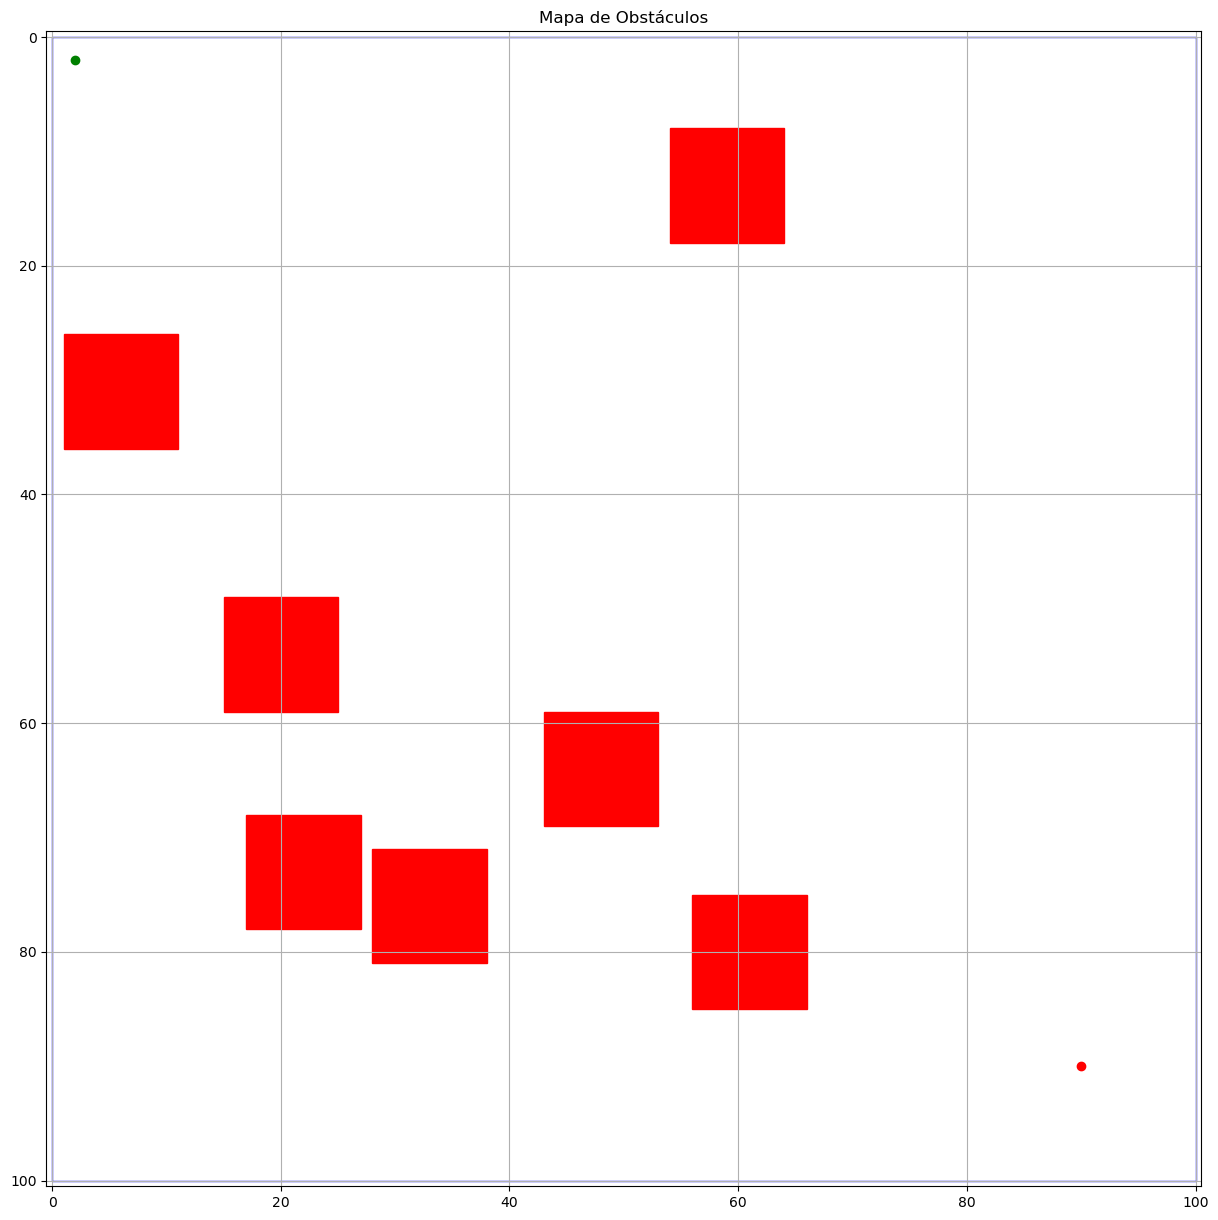

In [19]:
# Criando um retângulo
retangulo_mapa = patches.Rectangle((mapa['mapa'][0][1], mapa['mapa'][0][0]), mapa['mapa'][3][1], mapa['mapa'][3][0], edgecolor='blue', facecolor='none', label='Mapa')

fig, ax = plt.subplots(figsize=(15, 15))

# Obstaculos
for obstaculo in mapa['obstaculos']: 
    #obstaculos [[12, 4], [12, 14], [22, 4], [22, 14]]
    retangulo_obstaculo = patches.Rectangle((obstaculo[0][0], obstaculo[0][1]), obstaculo[3][1] - obstaculo[0][1], obstaculo[3][0] - obstaculo[0][0], edgecolor='red', facecolor='red')
    ax.add_patch(retangulo_obstaculo)


# limite do plot
plt.xlim(mapa['mapa'][0][0] - 0.5, mapa['mapa'][3][1] + 0.5)
plt.ylim(mapa['mapa'][0][0] - 0.5, mapa['mapa'][3][0] + 0.5)

ax.add_patch(retangulo_mapa) # adicionando Mapa

# Adicionar os pontos de início e fim
inicio = tuple(mapa['coordenada_inicial'])
fim = tuple(mapa['coordenada_final'])
plt.plot(*inicio, 'go', label='Início')
plt.plot(*fim, 'ro', label='Fim')

plt.gca().invert_yaxis() # Inverte o eixo Y (Para ficar parecido com o crescimento de uma matriz

# Adicionando legendas
#plt.legend()

plt.title('Mapa de Obstáculos')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Mantém a proporção dos eixos

# Exibindo o gráfico
plt.show()

# Determinar se os segmentos de retas entre os pontos se interceptam

Essa etapa consiste em verificar se um segmento do caminho entre o inicial e o final choca com o segmento de reta de um obstaculo. Se isso acontecer, siginifica que o caminho encontrado atualmente está atravessando algum obstaculo.

###  Etapa que devemos fazer para a criação de cada nó (filhos de um nó pai)
0 - Do ponto atual, traçar caminho para todos os vertices possíveis (incluindo para o vertice final)
1 - Quais são os vertices possíveis:
1.1 Vertice não visitado
1.2 Se eu estiver em um obstaculo, vertice que possui mesma linha ou mesma coluna + valor do tamanho do obstaculo
1.3 vertice que não intercepta nenhum segmento de reta dos obstaculo

In [20]:
'''
Recebe um segmento de reta euma lista de obstaculos
'''

def intercepta(segmento_caminho, obstaculos):
    '''
    segmento_caminho: [[x,y], [x,y]]
    obstaculos: [[[x, y], [x, y], [x, y], [x, y]], [[x, y], [x, y], [x, y], [x, y]]]
    
    Retorna True se houver interseção do segmento com um obstaculo.
    False caso não haja interseção
    '''
    segmento_caminho_linestring = LineString([segmento_caminho[0], segmento_caminho[1]])
    
    for obstaculo in obstaculos:
        '''
        obstaculo = [[40, 46], [40, 56], [50, 46], [50, 56]]
        '''
        obstaculo_linestrings = []
        obstaculo_linestrings.append(LineString([obstaculo[0], obstaculo[1]]))
        obstaculo_linestrings.append(LineString([obstaculo[0], obstaculo[2]]))
        obstaculo_linestrings.append(LineString([obstaculo[1], obstaculo[3]]))
        obstaculo_linestrings.append(LineString([obstaculo[2], obstaculo[3]]))
        
        for linestring in obstaculo_linestrings:
                
            if segmento_caminho_linestring.intersects(linestring):
                # aqui eu devo excluir os casos especiais
                
                if segmento_caminho[0] in obstaculo and segmento_caminho[1] in obstaculo:
                # é um segmento dentro do obstaculo
                    if segmento_caminho[0][0] != segmento_caminho[1][0] and segmento_caminho[0][1] != segmento_caminho[1][1]:
                        # segmento em diagonal do quadrado
                        return True
                else:
                    ponto = segmento_caminho_linestring.intersection(linestring)
                    if not ponto.is_empty:
                        # o ponto de interseção não é igual ao ponto do segmento
                        if len(list(ponto.coords)) > 1:
                            return True
                        
                        ponto = [ponto.x, ponto.y]
                        if not ponto in segmento_caminho:
                            return True
                    
                
    return False


In [21]:
'''
    Calcula a distância euclidiana entre dois pontos.
'''
def distancia_euclidiana(ponto1, ponto2):
    '''
        ponto1: [x,y]
        ponto2: [x,y]
    
        Retorna a distância euclidiana entre os dois pontos.
    '''
    x1, y1 = ponto1
    x2, y2 = ponto2
    
    distancia = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
    
    return distancia

In [22]:
class No:
    def __init__(self, caminho=[], vertice=None, visited=None):
        self.caminho = caminho
        self.vertice = vertice
        self.filhos = []
        self.distancia = distancia_euclidiana(self.vertice, mapa['coordenada_final'])
        self.visited = visited if visited is not None else set()

    def vertice_visitado(self, vertice):
        '''
            vertice: coordenada xy de uma vértice de um obstaculo ([x,y])
        '''
        return tuple(vertice) in self.visited  # Converta para tupla antes de verificar

    def cria_no(self, vertice_atual):
        '''
        retorna um novo nó da arvore
        
        vertice_atual: vertice atual do caminho
        '''
        
        novo_caminho = self.caminho.copy()
        novo_caminho.append(self.vertice)
        novo_visited = self.visited.copy()
        novo_visited.add(tuple(self.vertice))  # Converta para tupla antes de adicionar
        no = No(novo_caminho, vertice_atual, novo_visited)
        
        return no

    def criar_filhos(self, mapa):
        '''
            Cria nós para cada vertice que pode ser visitado no mapa
        
            mapa: dicionario contendo coordenadas para:
            
            mapa: coordenadas iniciais e finais do mapa
            coordenada_inicial: coordenada xy no mapa correspondente ao ponto de partida
            coordenada_final: coordenada xy no mapa correspondente ao ponto de chegada
            obstaculos: listas de coordenadas xy para os vertices do obstaculo
        '''
        if not intercepta([self.vertice, mapa['coordenada_final']], mapa['obstaculos']):
            no = self.cria_no(mapa['coordenada_final'])
            self.filhos.append(no)
        
        for obstaculo in mapa['obstaculos']:
            # obstaculo = [[x,y],[x,y],[x,y],[x,y]]
            
            for vertice_obstaculo in obstaculo:
                # vertice_obstaculo = [x,y]
                
                # verificar se vertice já foi visitado
                if self.vertice_visitado(vertice_obstaculo):
                    continue
                    
                # verificar se o vertice analisado é o vertice atual
                if self.vertice == vertice_obstaculo:
                    continue

                if distancia_euclidiana(vertice_obstaculo, mapa['coordenada_final']) > self.distancia:
                    continue
                    
                # verifica se segmento atual chega no destino
                if not intercepta([self.vertice, vertice_obstaculo], mapa['obstaculos']):
                    # criar no
                    no = self.cria_no(vertice_obstaculo)
                    self.filhos.append(no)

In [23]:
def criar_arvore():
    '''
    Cria o nó raiz e uma fila de criação dos filhos de cada nó
    
    Retorna a raiz da árvore 
    '''
    raiz = No([], mapa['coordenada_inicial'])
    fila = deque([raiz])  # Usar deque em vez de lista para a fila
    caminhos = []
    qtd_filhos=0

    limite_nos = 10000  # Adicionar um limite para o número de nós
    #  
    while fila and qtd_filhos < limite_nos:  # Adicionar condição de parada
        no = fila.popleft()  # Remover da esquerda em vez de pop(0)
        
        if no.vertice == mapa['coordenada_final']:
            c = no.caminho
            c.append(no.vertice)
            caminhos.append(c)
        
        # Criar filhos
        if no.vertice != mapa['coordenada_final']:  # Enquanto o vértice atual não for o ponto final
            qtd_filhos+=1
            no.criar_filhos(mapa)
            fila.extend(no.filhos)
                
    print(qtd_filhos)        
    return raiz, caminhos

In [24]:
arvore, caminhos = criar_arvore()

10000


In [25]:
caminhos

[[[2, 2], [90, 90]],
 [[2, 2], [54, 18], [90, 90]],
 [[2, 2], [64, 8], [90, 90]],
 [[2, 2], [53, 59], [90, 90]],
 [[2, 2], [54, 8], [54, 18], [90, 90]],
 [[2, 2], [54, 8], [64, 8], [90, 90]],
 [[2, 2], [54, 8], [53, 59], [90, 90]],
 [[2, 2], [54, 18], [64, 18], [90, 90]],
 [[2, 2], [54, 18], [53, 59], [90, 90]],
 [[2, 2], [54, 18], [56, 85], [90, 90]],
 [[2, 2], [54, 18], [66, 75], [90, 90]],
 [[2, 2], [64, 8], [64, 18], [90, 90]],
 [[2, 2], [64, 8], [66, 75], [90, 90]],
 [[2, 2], [43, 59], [53, 59], [90, 90]],
 [[2, 2], [43, 69], [56, 85], [90, 90]],
 [[2, 2], [43, 69], [66, 75], [90, 90]],
 [[2, 2], [53, 59], [56, 85], [90, 90]],
 [[2, 2], [53, 59], [66, 75], [90, 90]],
 [[2, 2], [1, 26], [54, 18], [90, 90]],
 [[2, 2], [1, 26], [64, 18], [90, 90]],
 [[2, 2], [11, 26], [54, 18], [90, 90]],
 [[2, 2], [11, 26], [64, 18], [90, 90]],
 [[2, 2], [11, 26], [53, 59], [90, 90]],
 [[2, 2], [38, 71], [56, 85], [90, 90]],
 [[2, 2], [38, 71], [66, 75], [90, 90]],
 [[2, 2], [25, 49], [64, 18], [90,

# Plotar caminhos no mapa

In [26]:
# Função para plotar uma única reta
def plotar_reta(coordenadas):
    x = [ponto[0] for ponto in coordenadas]
    y = [ponto[1] for ponto in coordenadas]
    plt.plot(x, y, color='blue', linestyle='-')
    plt.plot(x, y, color='red', marker='o', markersize=3, linestyle='None')  


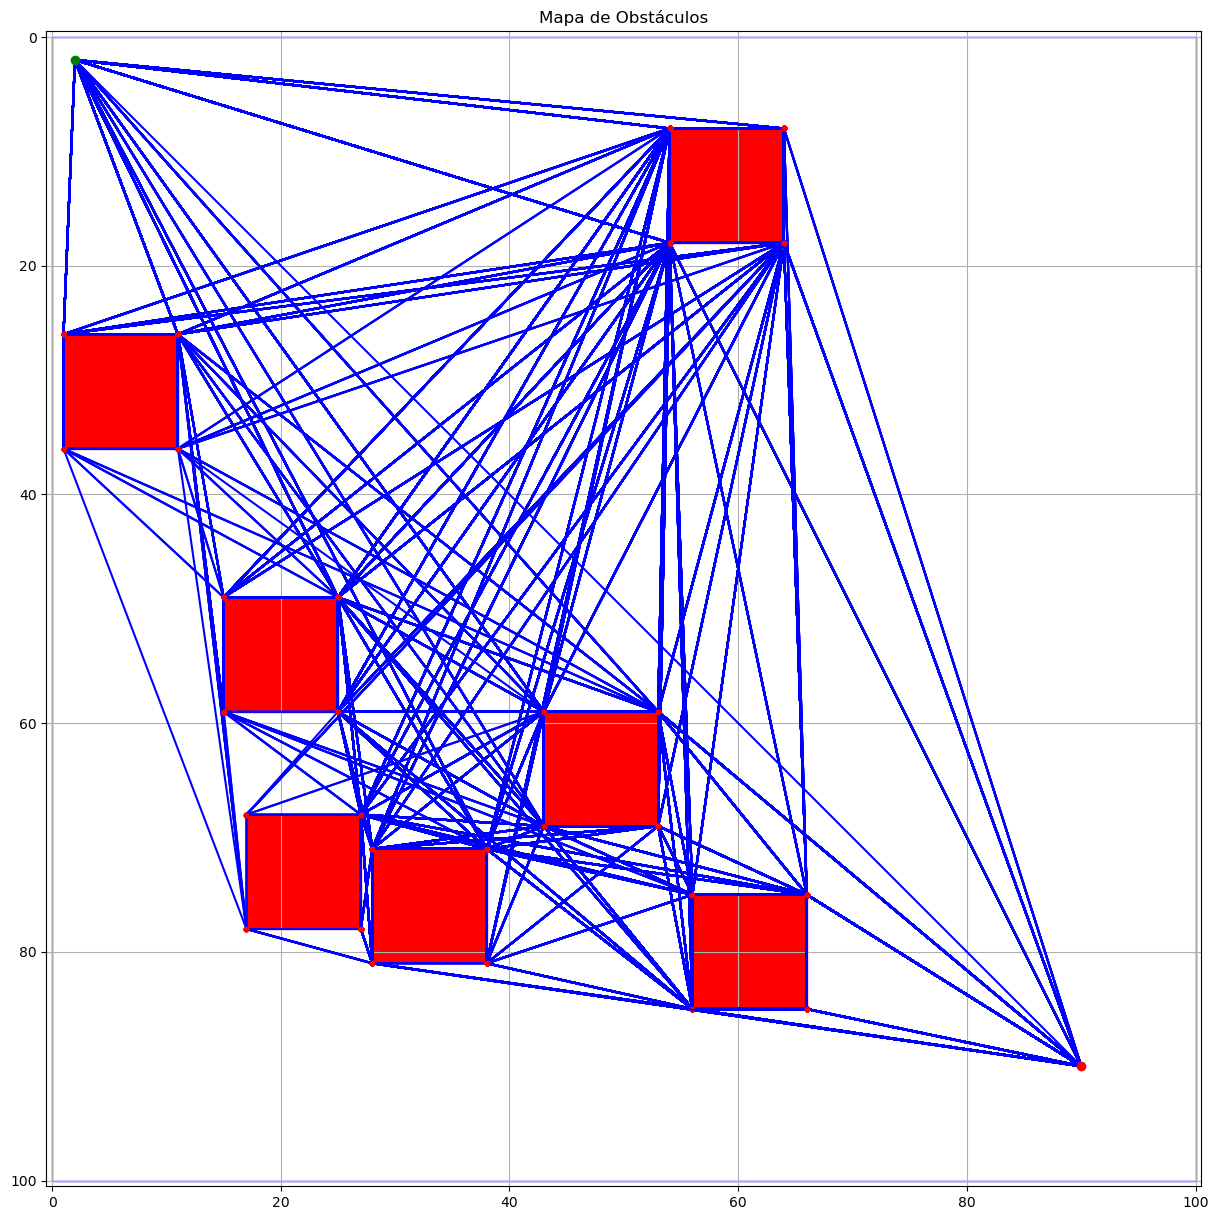

In [27]:
# Criando um retângulo
retangulo_mapa = patches.Rectangle((mapa['mapa'][0][1], mapa['mapa'][0][0]), mapa['mapa'][3][1], mapa['mapa'][3][0], edgecolor='blue', facecolor='none', label='Mapa')

fig, ax = plt.subplots(figsize=(15, 15))

# Obstaculos
for obstaculo in mapa['obstaculos']: 
    #obstaculos [[12, 4], [12, 14], [22, 4], [22, 14]]
    retangulo_obstaculo = patches.Rectangle((obstaculo[0][0], obstaculo[0][1]), obstaculo[3][1] - obstaculo[0][1], obstaculo[3][0] - obstaculo[0][0], edgecolor='red', facecolor='red')
    ax.add_patch(retangulo_obstaculo)


# limite do plot
plt.xlim(mapa['mapa'][0][0] - 0.5, mapa['mapa'][3][1] + 0.5)
plt.ylim(mapa['mapa'][0][0] - 0.5, mapa['mapa'][3][0] + 0.5)

ax.add_patch(retangulo_mapa) # adicionando Mapa

# Plotar todas as retas
for coordenadas in caminhos:
    plotar_reta(coordenadas)

# Adicionar os pontos de início e fim
inicio = tuple(mapa['coordenada_inicial'])
fim = tuple(mapa['coordenada_final'])
plt.plot(*inicio, 'go', label='Início')
plt.plot(*fim, 'ro', label='Fim')

plt.gca().invert_yaxis() # Inverte o eixo Y (Para ficar parecido com o crescimento de uma matriz

# Adicionando legendas
#plt.legend()

plt.title('Mapa de Obstáculos')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Mantém a proporção dos eixos

# Exibindo o gráfico
plt.show()

In [28]:
len(caminhos)

1397

# Encontrar menor caminho

# Plotar caminho com menor saltos

In [29]:
caminho_escolhido = min(caminhos, key=len)

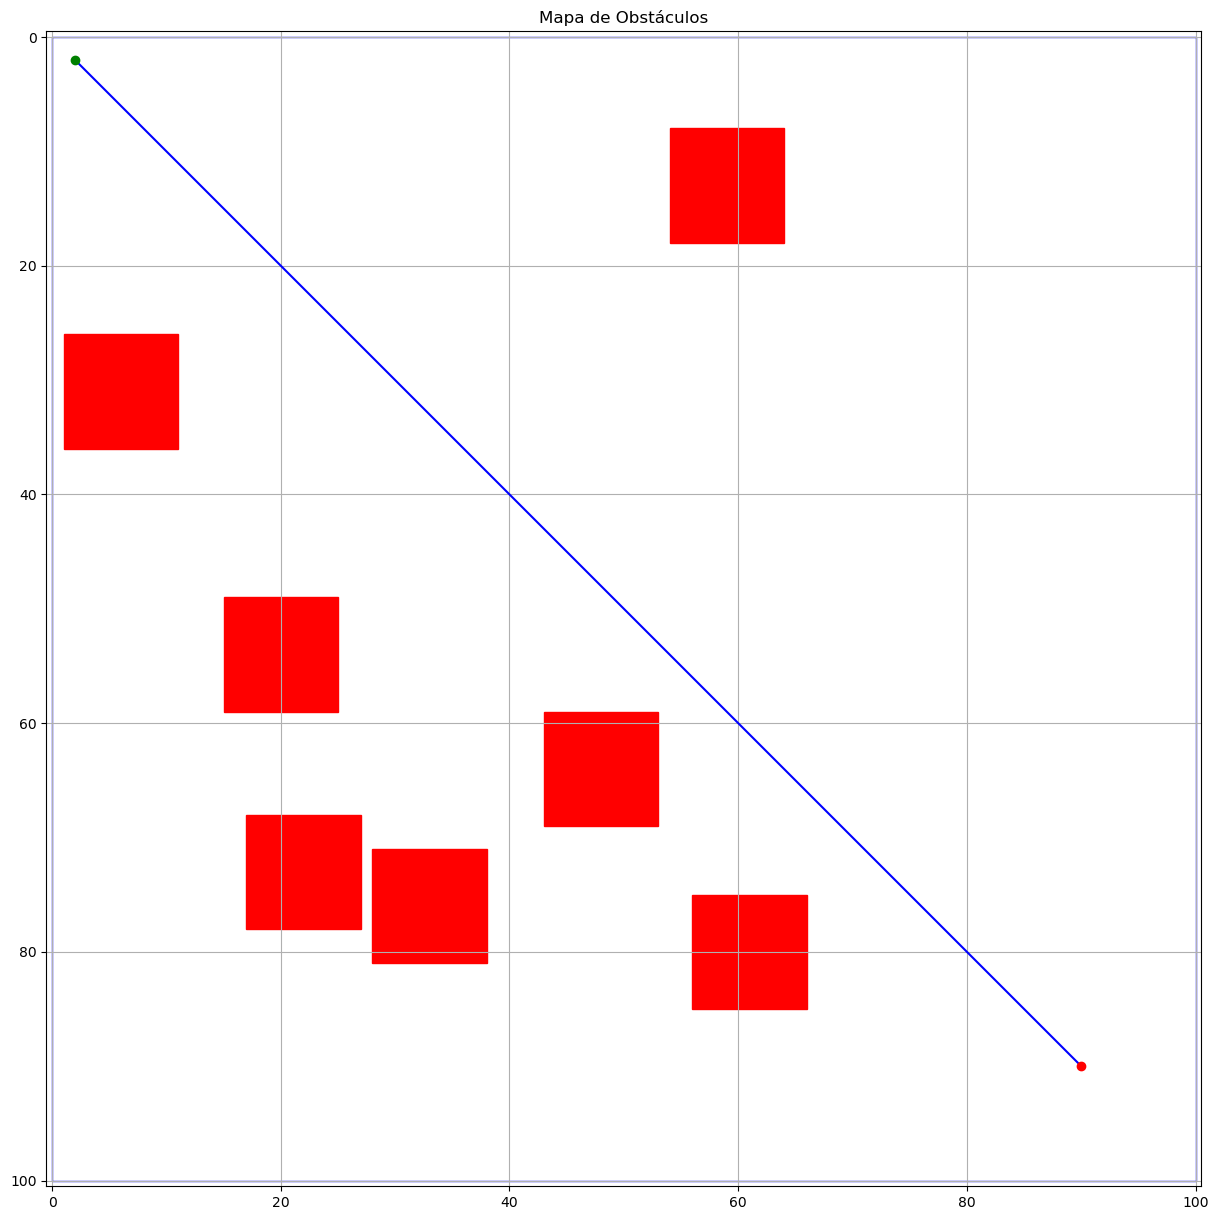

In [30]:
# Criando um retângulo
retangulo_mapa = patches.Rectangle((mapa['mapa'][0][1], mapa['mapa'][0][0]), mapa['mapa'][3][1], mapa['mapa'][3][0], edgecolor='blue', facecolor='none', label='Mapa')

fig, ax = plt.subplots(figsize=(15, 15))

# Obstaculos
for obstaculo in mapa['obstaculos']: 
    #obstaculos [[12, 4], [12, 14], [22, 4], [22, 14]]
    retangulo_obstaculo = patches.Rectangle((obstaculo[0][0], obstaculo[0][1]), obstaculo[3][1] - obstaculo[0][1], obstaculo[3][0] - obstaculo[0][0], edgecolor='red', facecolor='red')
    ax.add_patch(retangulo_obstaculo)


# limite do plot
plt.xlim(mapa['mapa'][0][0] - 0.5, mapa['mapa'][3][1] + 0.5)
plt.ylim(mapa['mapa'][0][0] - 0.5, mapa['mapa'][3][0] + 0.5)

ax.add_patch(retangulo_mapa) # adicionando Mapa

plotar_reta(caminho_escolhido)

# Adicionar os pontos de início e fim
inicio = tuple(mapa['coordenada_inicial'])
fim = tuple(mapa['coordenada_final'])
plt.plot(*inicio, 'go', label='Início')
plt.plot(*fim, 'ro', label='Fim')

plt.gca().invert_yaxis() # Inverte o eixo Y (Para ficar parecido com o crescimento de uma matriz

# Adicionando legendas
#plt.legend()

plt.title('Mapa de Obstáculos')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Mantém a proporção dos eixos

# Exibindo o gráfico
plt.show()